# Course 3, Week 3 - NLP with a ConvNet

* [Google Colab Notebook](https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%203%20-%20Lesson%201c.ipynb#scrollTo=7mlgzaRDMtF6)

Some of the content is outdated, but the concepts are valid :)

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.1


In [2]:
""" Load the dataset """
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [4]:
""" Get the predefined text encoder """
tokenizer = info.features['text'].encoder
tokenizer.vocab_size

8185

In [8]:
""" Shuffle and pad the batches.

The lesson uses train_dataset.output_shapes which is deprecated since it's an old V1 feature.
The below code fixes it, but it's temporary until V1 support is completely removed.
"""
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_output_shapes = tf.compat.v1.data.get_output_shapes(train_dataset)
test_output_shapes = tf.compat.v1.data.get_output_shapes(test_dataset)

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_output_shapes)

In [10]:
""" Define the model with an Embedding input layer and a Convolution """
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [11]:
""" Compile the model """
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [12]:
""" Train the model """
NUM_EPOCHS = 10
history = model.fit(
    train_dataset,
    epochs=NUM_EPOCHS,
    validation_data=test_dataset
)

Epoch 1/10
391/391 [==============================] - 69s 176ms/step - loss: 0.4499 - accuracy: 0.7795 - val_loss: 0.3106 - val_accuracy: 0.8766
Epoch 2/10
391/391 [==============================] - 68s 175ms/step - loss: 0.2216 - accuracy: 0.9181 - val_loss: 0.3074 - val_accuracy: 0.8741
Epoch 3/10
391/391 [==============================] - 66s 168ms/step - loss: 0.1711 - accuracy: 0.9375 - val_loss: 0.3176 - val_accuracy: 0.8767
Epoch 4/10
391/391 [==============================] - 66s 169ms/step - loss: 0.1362 - accuracy: 0.9525 - val_loss: 0.3825 - val_accuracy: 0.8653
Epoch 5/10
391/391 [==============================] - 64s 164ms/step - loss: 0.1120 - accuracy: 0.9601 - val_loss: 0.4122 - val_accuracy: 0.8676
Epoch 6/10
391/391 [==============================] - 63s 162ms/step - loss: 0.0920 - accuracy: 0.9689 - val_loss: 0.4831 - val_accuracy: 0.8612
Epoch 7/10
391/391 [==============================] - 65s 167ms/step - loss: 0.0700 - accuracy: 0.9773 - val_loss: 0.5568 - val_ac

In [13]:
""" Plot function to visualize training """
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

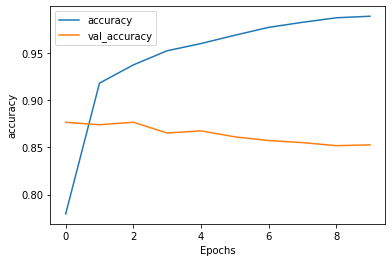

In [14]:
plot_graphs(history, 'accuracy')

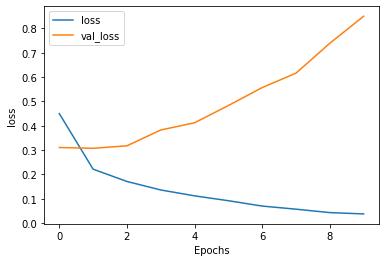

In [15]:
plot_graphs(history, 'loss')